<h2>Import libraries for data wrangling, preprocessing and visualization</h2>

In [1]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<h2>Importing libraries for building the neural network</h2>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [12]:
data_original = pd.read_csv("training.csv", header=0)
data = data_original

In [19]:
data.head(5)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154.0,25312.0,118.0,0.0,68.0,22.73,0.0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252.0,59342.0,81.0,0.0,77.0,27.42,0.0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783.0,50777.0,118.0,0.0,25.0,31.95,0.0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267.0,46918.0,118.0,0.0,81.0,22.64,1.0,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056.0,34377.0,33.0,0.0,19.0,NaN,0.0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110369 entries, 0 to 110368
Columns: 183 entries, hospital_death to apache_2_bodysystem
dtypes: float64(175), object(8)
memory usage: 154.1+ MB


In [15]:
data.skew()

encounter_id                     -0.002258
patient_id                        0.000777
hospital_id                      -0.045683
hospital_death                    2.946519
age                              -0.624474
bmi                               1.440833
elective_surgery                  1.633330
height                           -0.101455
icu_id                           -0.163940
pre_icu_los_days                 10.988615
readmission_status                0.000000
weight                            1.069070
albumin_apache                   -0.106721
apache_2_diagnosis                0.507410
apache_3j_diagnosis               1.013397
apache_post_operative             1.491413
arf_apache                        5.724633
bilirubin_apache                  8.656251
bun_apache                        2.129075
creatinine_apache                 3.546544
fio2_apache                       0.476616
gcs_eyes_apache                  -1.684388
gcs_motor_apache                 -2.712376
gcs_unable_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbe8c5a080>,
      dtype=object)

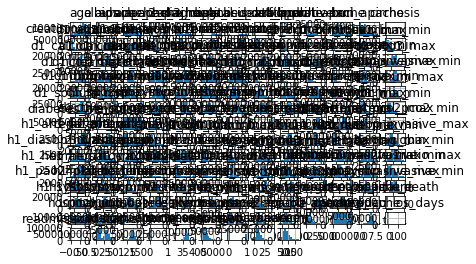

In [16]:
data.hist()


Feature Correlation:



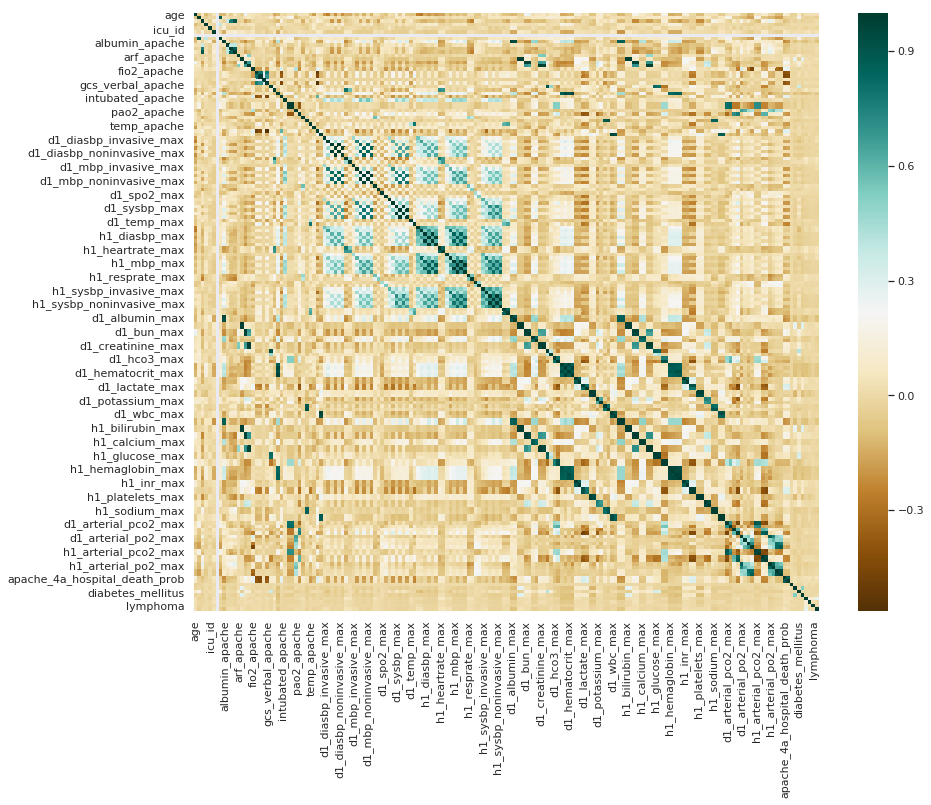

In [64]:
print("\nFeature Correlation:\n")
sns.set(rc={'figure.figsize':(14, 11)})
g = sns.heatmap(X.corr(),cmap="BrBG",annot=False)

In [59]:
data.isnull().any()

hospital_death                   True
age                              True
bmi                              True
elective_surgery                 True
ethnicity                        True
gender                           True
height                           True
hospital_admit_source            True
icu_admit_source                 True
icu_id                           True
icu_stay_type                    True
icu_type                         True
pre_icu_los_days                 True
readmission_status               True
weight                           True
albumin_apache                   True
apache_2_diagnosis               True
apache_3j_diagnosis              True
apache_post_operative            True
arf_apache                       True
bilirubin_apache                 True
bun_apache                       True
creatinine_apache                True
fio2_apache                      True
gcs_eyes_apache                  True
gcs_motor_apache                 True
gcs_unable_a

In [17]:
data.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [18]:
data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data.drop("encounter_id", axis=1, inplace=True)
data.drop("patient_id", axis=1, inplace=True)
data.drop("hospital_id", axis=1, inplace=True)

In [21]:
data.head(2)

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0.0,68.0,22.73,0.0,Caucasian,M,180.3,Floor,Floor,92.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0.0,77.0,27.42,0.0,Caucasian,F,160.0,Floor,Floor,90.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [77]:
data.dtypes

hospital_death                   float64
age                              float64
bmi                              float64
elective_surgery                 float64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                           float64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status               float64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            float64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache                       float64
creatinine_apache                float64
fio2_apache                      float64
gcs_eyes_apache 

In [78]:
data.select_dtypes(['object'])

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
5,Caucasian,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic
6,Caucasian,F,Operating Room,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory
7,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Sepsis,Cardiovascular
8,Caucasian,M,Other Hospital,Other Hospital,admit,CCU-CTICU,Cardiovascular,Cardiovascular
9,NaN,M,Direct Admit,Accident & Emergency,admit,CCU-CTICU,Cardiovascular,Cardiovascular


In [91]:
data['ethnicity'].unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [92]:
data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [93]:
data['hospital_admit_source'].unique()

array(['Floor', 'Emergency Department', 'Operating Room', nan,
       'Direct Admit', 'Other Hospital', 'Other ICU', 'ICU to SDU',
       'Recovery Room', 'Chest Pain Center', 'Step-Down Unit (SDU)',
       'Acute Care/Floor', 'PACU', 'Observation', 'ICU', 'Other'],
      dtype=object)

In [94]:
data['icu_admit_source'].unique()

array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU', nan], dtype=object)

In [95]:
data['icu_stay_type'].unique()

array(['admit', 'readmit', 'transfer', nan], dtype=object)

In [96]:
data['icu_type'].unique()

array(['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU',
       'Cardiac ICU', 'CSICU', nan], dtype=object)

In [97]:
data['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [98]:
data['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

In [ ]:
one=OneHotEncoder()
for c in  data.columns:
    if(data[c].dtype=='object'):
        data[c]=label.fit_transform(data[c])
    else:
        data[c]=X[c]

In [74]:
from sklearn.preprocessing import Imputer
def replace_missing_value(df, number_features):
    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [75]:
data_tmp = replace_missing_value(data, columns)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: could not convert string to float: 'Caucasian'

In [ ]:
columns = data.columns

In [ ]:
output_cols = columns[1:183]

In [ ]:
Y = data['hospital_death'].values

In [ ]:
X = data[output_cols]

In [66]:
X.fillna(X.mean(), inplace=True)

/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [68]:
X.isnull().any()

age                              False
bmi                              False
elective_surgery                 False
ethnicity                         True
gender                            True
height                           False
hospital_admit_source             True
icu_admit_source                  True
icu_id                           False
icu_stay_type                     True
icu_type                          True
pre_icu_los_days                 False
readmission_status               False
weight                           False
albumin_apache                   False
apache_2_diagnosis               False
apache_3j_diagnosis              False
apache_post_operative            False
arf_apache                       False
bilirubin_apache                 False
bun_apache                       False
creatinine_apache                False
fio2_apache                      False
gcs_eyes_apache                  False
gcs_motor_apache                 False
gcs_unable_apache        

In [69]:
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=182, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [71]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').